In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import roc_auc_score

# importing catboost classifier
from catboost import CatBoostClassifier

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer,recall_score
# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

# Data Gathering

In [4]:
# data Gathering

main_df = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
prev_application = pd.read_csv('previous_application.csv')
credit_card_bal = pd.read_csv('credit_card_balance.csv')
pos_cash_bal = pd.read_csv('credit_card_balance.csv')
installments_paym = pd.read_csv('installments_payments.csv')

In [5]:
main_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
main_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [7]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [9]:
prev_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [10]:
credit_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [11]:
credit_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [12]:
pos_cash_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [13]:
installments_paym.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [14]:
# extract features from previous_application dataset

prev_application['count_prev'] = prev_application.groupby('SK_ID_CURR')['SK_ID_CURR'].transform('count')    # count of previous application
prev_application['annuity_avg'] = round(prev_application.groupby('SK_ID_CURR')['AMT_ANNUITY'].transform('mean'),2)  # average amount annuity by current application
prev_application['AVG_AMT_APP'] = round(prev_application.groupby('SK_ID_CURR')['AMT_APPLICATION'].transform('mean'),2)

# create dataframe of modify feature
prev_app = prev_application[['SK_ID_CURR','count_prev','annuity_avg','AVG_AMT_APP']]
prev_app = prev_app.drop_duplicates()

#verify
prev_app.shape

(338857, 4)

In [15]:
# merging features from previous application

main_df = main_df.merge(right=prev_app.reset_index(), how='left', on='SK_ID_CURR')

In [16]:
def table_summary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

In [17]:
data_summary = table_summary(main_df)
pd.set_option("max_rows", None)
data_summary

Dataset Shape: (307511, 126)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,SK_ID_CURR,int64,0,307511,100002,100003
1,TARGET,int64,0,2,1,0
2,NAME_CONTRACT_TYPE,object,0,2,Cash loans,Cash loans
3,CODE_GENDER,object,0,3,M,F
4,FLAG_OWN_CAR,object,0,2,N,N
5,FLAG_OWN_REALTY,object,0,2,Y,N
6,CNT_CHILDREN,int64,0,15,0,0
7,AMT_INCOME_TOTAL,float64,0,2548,202500.0,270000.0
8,AMT_CREDIT,float64,0,5603,406597.5,1293502.5
9,AMT_ANNUITY,float64,12,13672,24700.5,35698.5


# Data Preparation

In [18]:
# create function to sort numerical and categorical columns

def sort_cat_num(data):

  num_col = []
  cat_col = []
  for columns in data:
      if data[columns].dtype == 'float64' or data[columns].dtype == 'int64':
          num_col.append(columns)
      elif data[columns].dtype == 'object':
          cat_col.append(columns)

  return num_col, cat_col


In [19]:
# sort categorical columns
num_cols , cat_cols = sort_cat_num(main_df)
num_cols = num_cols[2:]

In [20]:
# filling missing values in numerical columns with mean

for columns in num_cols:
    main_df[columns].fillna(value=main_df[columns].mean(),inplace=True)

In [21]:
# replacing nan values in categorical columns with string
# to support catboost model

main_df[cat_cols] = main_df[cat_cols].fillna('')

In [22]:
# feature selection based on correlation

# we can select highly correlated features
# it will note the first feature that is correlated with any other feature

def get_corr_col(dataset, threshold):
    corr_col = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                corr_col.add(colname)
    return corr_col

In [23]:
# selecting features with correlation above 7
corr_features = get_corr_col(main_df[num_cols], 0.7)
len(corr_features)

42

In [24]:
# check features to remove
corr_features

{'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'AVG_AMT_APP',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'FLAG_EMP_PHONE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT_W_CITY',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE'}

In [25]:
main_df.drop(corr_features,axis=1, inplace = True)

In [26]:
main_df.shape

(307511, 84)

## Exploration

In [27]:
# checking value proportion in categorical columns
for i in cat_cols:
    print(i,':')
    print(main_df[i].value_counts(normalize=True))
    print('*'*40)

NAME_CONTRACT_TYPE :
Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64
****************************************
CODE_GENDER :
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
****************************************
FLAG_OWN_CAR :
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64
****************************************
FLAG_OWN_REALTY :
Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64
****************************************
NAME_TYPE_SUITE :
Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
                   0.004201
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64
****************************************
NAME_INCOME_TYPE :
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant        

## Splitting

In [28]:
# separate target from features

X = main_df.drop(["TARGET",'SK_ID_CURR'],axis=1)
y = main_df["TARGET"]


In [29]:
# train and test split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=1, stratify = y)

## Handling data imbalance

In [30]:
# create oversample instance

oversample = RandomOverSampler(sampling_strategy='minority')

In [31]:
# check balance
print(X_train.shape)
print(y_train[y_train == 1].shape)
print(y_train[y_train == 0].shape)

(215257, 82)
(17377,)
(197880,)


In [32]:
#perform oversample fit
X_train, y_train = oversample.fit_resample(X_train, y_train)

# check balance
print(X_train.shape)
print(y_train[y_train == 1].shape)
print(y_train[y_train == 0].shape)

(395760, 82)
(197880,)
(197880,)


# Training

In [37]:
model_cb = CatBoostClassifier(task_type='GPU', iterations=200, 
                              random_state = 400,depth=13,eval_metric="AUC")
                              

In [38]:
model_cb.fit(X_train, y_train, cat_features= cat_cols, plot=True, eval_set=(X_val, y_val))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.083391


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7147557	best: 0.7147557 (0)	total: 577ms	remaining: 1m 54s
1:	total: 1.18s	remaining: 1m 56s
2:	total: 1.75s	remaining: 1m 54s
3:	total: 2.34s	remaining: 1m 54s
4:	total: 2.94s	remaining: 1m 54s
5:	test: 0.7275234	best: 0.7275234 (5)	total: 3.52s	remaining: 1m 53s
6:	total: 4.12s	remaining: 1m 53s
7:	total: 4.74s	remaining: 1m 53s
8:	total: 5.31s	remaining: 1m 52s
9:	total: 5.89s	remaining: 1m 51s
10:	test: 0.7287928	best: 0.7287928 (10)	total: 6.52s	remaining: 1m 52s
11:	total: 7.12s	remaining: 1m 51s
12:	total: 7.71s	remaining: 1m 50s
13:	total: 8.3s	remaining: 1m 50s
14:	total: 8.9s	remaining: 1m 49s
15:	test: 0.7319658	best: 0.7319658 (15)	total: 9.53s	remaining: 1m 49s
16:	total: 10.2s	remaining: 1m 49s
17:	total: 10.8s	remaining: 1m 49s
18:	total: 11.4s	remaining: 1m 48s
19:	total: 12s	remaining: 1m 47s
20:	test: 0.7331851	best: 0.7331851 (20)	total: 12.6s	remaining: 1m 47s
21:	total: 13.3s	remaining: 1m 47s
22:	total: 13.9s	remaining: 1m 47s
23:	total: 14.6s	remaining

193:	total: 2m 1s	remaining: 3.74s
194:	total: 2m 1s	remaining: 3.12s
195:	test: 0.6921374	best: 0.7339078 (25)	total: 2m 2s	remaining: 2.5s
196:	total: 2m 3s	remaining: 1.87s
197:	total: 2m 3s	remaining: 1.25s
198:	total: 2m 4s	remaining: 625ms
199:	test: 0.6915618	best: 0.7339078 (25)	total: 2m 5s	remaining: 0us
bestTest = 0.7339077592
bestIteration = 25
Shrink model to first 26 iterations.


In [39]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No_pay', 'pay'], yticklabels=['No pay', 'paid'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.82      0.79      0.81    197880
           1       0.80      0.83      0.82    197880

    accuracy                           0.81    395760
   macro avg       0.81      0.81      0.81    395760
weighted avg       0.81      0.81      0.81    395760



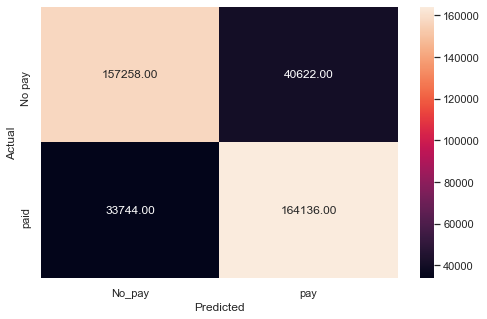

In [40]:
pred_train = model_cb.predict(X_train)
metrics_score(y_train, pred_train)

In [41]:
pred = model_cb.predict(X_val)


              precision    recall  f1-score   support

           0       0.95      0.78      0.86     84806
           1       0.18      0.56      0.27      7448

    accuracy                           0.76     92254
   macro avg       0.57      0.67      0.57     92254
weighted avg       0.89      0.76      0.81     92254



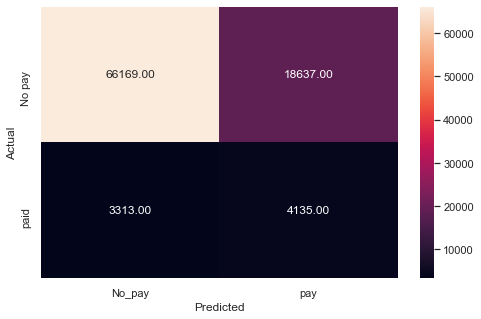

In [42]:
metrics_score(y_val, pred)

In [43]:
pred_prob = model_cb.predict_proba(X_val)

auc_score = roc_auc_score(y_val, pred_prob[:,1])
print(auc_score)

0.7339077701775808


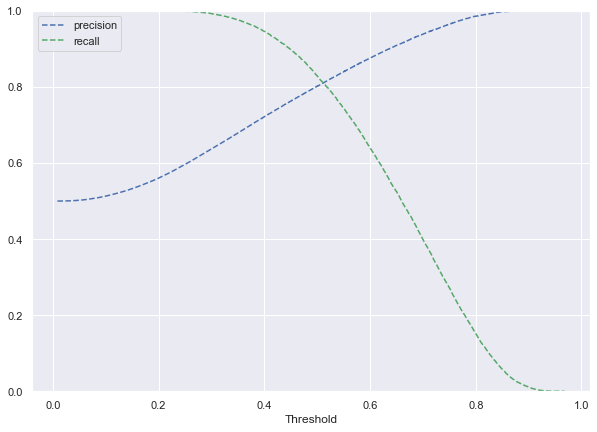

In [44]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_modelCB =model_cb.predict_proba(X_train)

precisions_cb, recalls_cb, thresholds_cb = precision_recall_curve(y_train, y_scores_modelCB[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_cb, precisions_cb[:-1], 'b--', label='precision')
plt.plot(thresholds_cb, recalls_cb[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**

> We can see that precision and recall are balanced for a threshold of about ~0.5.

> AUC Score is 0.73